It generates superimposed images for **extra test**
* Superimposed prediction over image
* Superimposed prediction over ground truth
* Superimposed ground truth over image
* Prediction

and it calculates IoU.

In [14]:
import glob
import os
import re
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import pandas as pd
from sklearn.metrics import jaccard_score
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

# Test

In [5]:
test_predicted_dir = "/home/pcallec/nnUNet_blood-vessel/results/extra_test_pred"

test_predicted_img_paths = glob.glob(test_predicted_dir + "/*.nii.gz")
test_predicted_img_paths.sort()

001.nii.gz
002.nii.gz
003.nii.gz
004.nii.gz
005.nii.gz


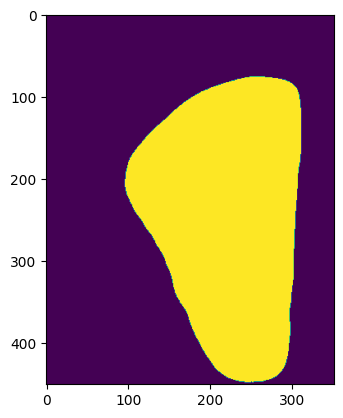

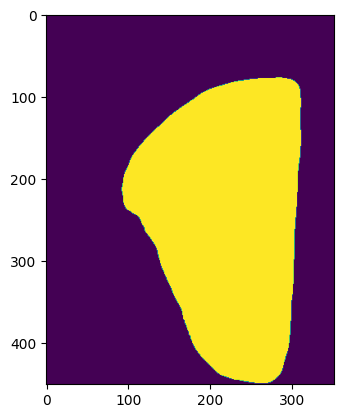

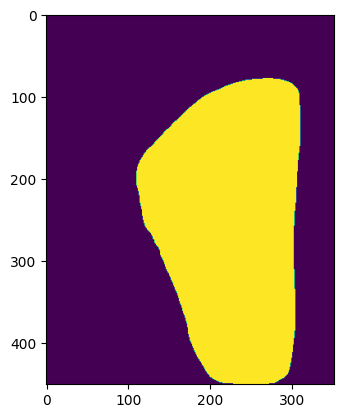

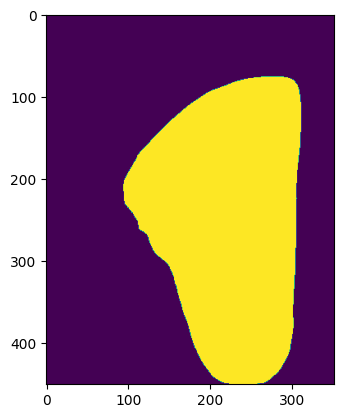

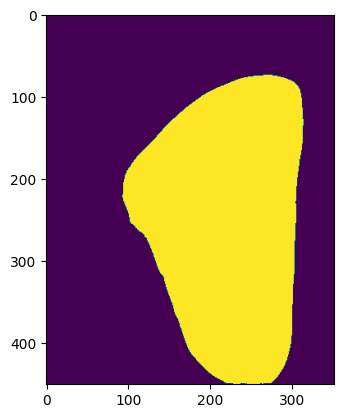

In [6]:
l_truth = []
l_predicted = []

# for i in range(len(testing_predicted_img_paths)):
for i in range(5):
 
    print(os.path.basename(test_predicted_img_paths[i]))
    
    img = nib.load(test_predicted_img_paths[i])
    epi_img_data = img.get_fdata()
    
#     l_truth.append(a_img_pillow[:])
    l_predicted.append(epi_img_data.T[0][:])
    fig = plt.figure()
    plt.imshow(epi_img_data.T[0])
#     break

# Overlapped images

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:09<00:00, 10.02it/s]


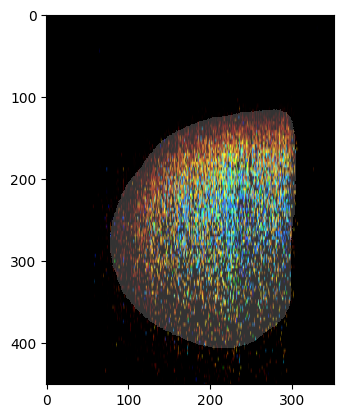

In [15]:
l_truth = []
l_predicted = []

path_dataset = "/home/pcallec/nnUNet_blood-vessel/data/100-Doppler-test"
path_output = "/home/pcallec/nnUNet_blood-vessel/results/processed_results/"

predicted_dir = "/home/pcallec/nnUNet_blood-vessel/results/extra_test_pred"

test_predicted_img_paths = glob.glob(predicted_dir + "/*.nii.gz")
test_predicted_img_paths.sort()

for test_predicted_path in tqdm(test_predicted_img_paths):

    re_number = re.compile(r'(?<=/)[0-9]{3}')
    img_number = re_number.search(test_predicted_path).group(0)
    path_label_truth = os.path.join(path_dataset, f"{img_number}_test-labeled_1ch.png")
    path_image = os.path.join(path_dataset, f"{img_number}.png")

    # print("img_number = ", img_number)
    # print(path_image)
    # print(path_label_truth)


    # Read image
    img_input_pillow = Image.open(path_image)
    a_img_input_pillow = np.array(img_input_pillow)
    # print("a_img_input_pillow.shape = ", a_img_input_pillow.shape)

    # Read label
    img_label_pillow = Image.open(path_label_truth)
    a_img_label_pillow = np.array(img_label_pillow)
    # print("a_img_label_pillow.shape = ", a_img_label_pillow.shape)

    # Changing values of label to 0 and 1
    np.place(a_img_label_pillow, a_img_label_pillow == 53, 0)
    np.place(a_img_label_pillow, a_img_label_pillow == 91, 255)

    # Read prediction
#     a_img_pillow = np.where(a_img_pillow ==255, 1, a_img_pillow)
    img = nib.load(test_predicted_path)
    epi_img_data = img.get_fdata()
    mask_cv2 = np.uint8(epi_img_data[:,:,0].T)
    mask_cv2_color = cv2.applyColorMap(mask_cv2*255, cv2.COLORMAP_RAINBOW)
#     plt.imshow(mask_cv2_color, interpolation='nearest')

    # Superimposed prediction over image
    superimposed_img = mask_cv2_color*0.5 + a_img_input_pillow
#     superimposed_img =  a_img_input_pillow

    # create directory
    path_superimposed = os.path.join(path_output,f"superimposed_pred_over_img/extra_test")
    os.makedirs(path_superimposed, exist_ok = True)                                 
#         plt.imshow(superimposed_img/np.max(superimposed_img), interpolation='nearest')                                        
    path_superimposed_over_image = os.path.join(path_superimposed,f"superimposed_pred_over_img_{img_number}.png")
    plt.imsave(path_superimposed_over_image,
               superimposed_img/np.max(superimposed_img))

    # Superimposed prediction over label
    path_superimposed = os.path.join(path_output,f"superimposed_pred_over_label/extra_test")
    os.makedirs(path_superimposed, exist_ok = True)                                 

    superimposed_img = mask_cv2_color*2.5 + a_img_label_pillow[:,:,None]
#         plt.imshow(superimposed_img/np.max(superimposed_img), interpolation='nearest')
    path_superimposed_over_label = os.path.join(path_superimposed,f"superimposed_pred_over_label_{img_number}.png")

    plt.imsave(path_superimposed_over_label,
               superimposed_img/np.max(superimposed_img))

    # Superimposed label over image
    path_superimposed = os.path.join(path_output,f"superimposed_label_over_img/extra_test")
    os.makedirs(path_superimposed, exist_ok = True)                                 

    superimposed_img = a_img_label_pillow[:,:,None]*0.25 + a_img_input_pillow
    plt.imshow(superimposed_img/np.max(superimposed_img), interpolation='nearest')
    path_superimposed_over_label = os.path.join(path_superimposed,f"superimposed_label_over_img_{img_number}.png")

    plt.imsave(path_superimposed_over_label,
               superimposed_img/np.max(superimposed_img))
#         break
    # Prediction saved
#     mask_cv2 has values 0 and 1
    im = Image.fromarray(mask_cv2*255)

    # Prediction
    path_prediction = os.path.join(path_output,f"prediction/extra_test")
    os.makedirs(path_prediction, exist_ok = True)                                 

    path_prediction_image = os.path.join(path_prediction, f"prediction_{img_number}.png")                   
    im.save(path_prediction_image)

# IoU calculation

In [17]:
# Compare prediction and truth
# then calculate iou for background and blood-vessel

from PIL import Image
from sklearn.metrics import jaccard_score
import pandas as pd

l_truth = []
l_predicted = []

path_dataset = "/home/pcallec/nnUNet_blood-vessel/data/100-Doppler-test"
path_prediction_test = "/home/pcallec/nnUNet_blood-vessel/results/processed_results/prediction/extra_test"
path_output = "/home/pcallec/nnUNet_blood-vessel/results/processed_results/"

# predicted_dir = "/home/pcallec/nnUNet_blood-vessel/results/test_pred"

test_predicted_img_paths = glob.glob(path_prediction_test + "/*.png")
test_predicted_img_paths.sort()

l_columns = ["index","IoU class 0", "IoU class 1"] 
df_test = pd.DataFrame(columns = l_columns)

for test_predicted_path in tqdm(test_predicted_img_paths):

    re_number = re.compile(r'(?<=prediction_)[0-9]{3}')
    img_number = re_number.search(test_predicted_path).group(0)
    truth_label_path = os.path.join(path_dataset, f"{img_number}_test-labeled_1ch.png")
    
    image_pred = Image.open(test_predicted_path)
    image_truth = Image.open(truth_label_path)
   
    a_image_pred = np.array(image_pred)
    a_image_truth = np.array(image_truth)
    
    a_image_truth[a_image_truth == 53] = 0
    a_image_truth[a_image_truth == 91] = 255
    
    # Prediction image contains 0 and 1
    # Truth image contains 53(background) and 91(blood-vessel)
    
    jaccard_temp = jaccard_score(a_image_pred.ravel(), a_image_truth.ravel(), average=None)

    data_temp = {"index": [int(img_number)],
                 "IoU class 0": [jaccard_temp[0]],
                 "IoU class 1": [jaccard_temp[1]]}
    df_temp = pd.DataFrame(data_temp)
#         print(f"fold {i} index {index}")
    df_test = pd.concat([df_test, df_temp], ignore_index = True)
    
#     break

100%|██████████| 100/100 [00:02<00:00, 40.62it/s]


In [20]:
df_test.shape

(100, 3)

In [19]:
df_test.head()

,index,IoU class 0,IoU class 1
0,1,0.935221,0.893656
1,2,0.938898,0.903487
2,3,0.971478,0.949497
3,4,0.963663,0.938863
4,5,0.954939,0.927734


array([[<AxesSubplot: title={'center': 'IoU class 1'}>]], dtype=object)

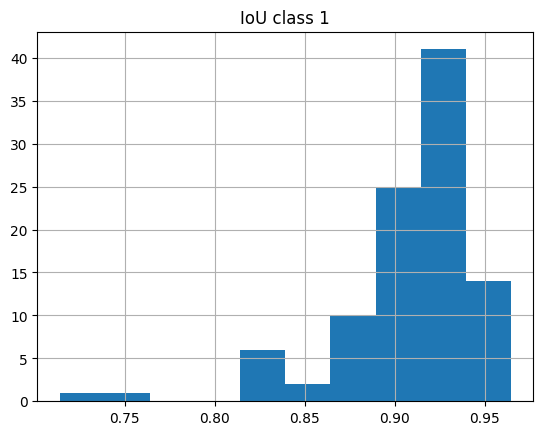

In [21]:
df_test.hist(column="IoU class 1")

In [22]:
df_test.to_csv("../../results/processed_results/iou_all_extra_test.csv")